# 00-bucket-ga-et-data-analysis



In [1]:
!aws s3 ls ga-et-data

                           PRE MODIS_NDVI/
                           PRE inputsv0/
                           PRE lunch/
2020-02-26 05:11:08        100 readme-bucket.md


In [3]:
!aws s3 ls ga-et-data/MODIS_NDVI/

                           PRE 2013/
                           PRE 2014/
                           PRE 2015/
                           PRE 2016/


In [4]:
!aws s3 ls ga-et-data/MODIS_NDVI/2016/ > 2016.out

In [5]:
! head 2016.out

2020-02-28 13:48:04         83 2016001.1_km_16_days_NDVI.tfw
2020-02-28 13:48:16  137661274 2016001.1_km_16_days_NDVI.tif
2020-02-28 13:48:05       1833 2016001.1_km_16_days_NDVI.tif.aux.xml
2020-02-28 13:48:04         83 2016002.1_km_16_days_NDVI.tfw
2020-02-28 13:48:36  137661288 2016002.1_km_16_days_NDVI.tif
2020-02-28 13:48:05       1839 2016002.1_km_16_days_NDVI.tif.aux.xml
2020-02-28 13:48:05         83 2016003.1_km_16_days_NDVI.tfw
2020-02-28 13:48:36  137661290 2016003.1_km_16_days_NDVI.tif
2020-02-28 13:48:05       1836 2016003.1_km_16_days_NDVI.tif.aux.xml
2020-02-28 13:48:05         83 2016004.1_km_16_days_NDVI.tfw


In [7]:
! gdalinfo /vsis3/ga-et-data/MODIS_NDVI/2016/2016001.1_km_16_days_NDVI.tif

Driver: GTiff/GeoTIFF
Files: /vsis3/ga-et-data/MODIS_NDVI/2016/2016001.1_km_16_days_NDVI.tif
       /vsis3/ga-et-data/MODIS_NDVI/2016/2016001.1_km_16_days_NDVI.tif.aux.xml
Size is 10709, 3108
Coordinate System is:
GEOGCS["WGS 84",
    DATUM["WGS_1984",
        SPHEROID["WGS 84",6378137,298.257223563,
            AUTHORITY["EPSG","7030"]],
        AUTHORITY["EPSG","6326"]],
    PRIMEM["Greenwich",0],
    UNIT["degree",0.0174532925199433],
    AUTHORITY["EPSG","4326"]]
Origin = (-155.572382657999981,49.999999996000085)
Pixel Size = (0.009651999920610,-0.009651999920610)
Metadata:
  AREA_OR_POINT=Area
Image Structure Metadata:
  INTERLEAVE=BAND
Corner Coordinates:
Upper Left  (-155.5723827,  50.0000000) (155d34'20.58"W, 50d 0' 0.00"N)
Lower Left  (-155.5723827,  20.0015842) (155d34'20.58"W, 20d 0' 5.70"N)
Upper Right ( -52.2091155,  50.0000000) ( 52d12'32.82"W, 50d 0' 0.00"N)
Lower Right ( -52.2091155,  20.0015842) ( 52d12'32.82"W, 20d 0' 5.70"N)
Center      (-103.8907491,  35.0007921) (1

In [9]:
%env CURL_CA_BUNDLE=/etc/ssl/certs/ca-certificates.crt
! rio info 

env: CURL_CA_BUNDLE=/etc/ssl/certs/ca-certificates.crt
{"blockxsize": 128, "blockysize": 128, "bounds": [-155.57238265799998, 20.001584242744208, -52.209115508187494, 49.999999996000085], "colorinterp": ["gray"], "count": 1, "crs": "EPSG:4326", "descriptions": [null], "driver": "GTiff", "dtype": "float32", "height": 3108, "indexes": [1], "interleave": "band", "lnglat": [-103.89074908309374, 35.00079211937215], "mask_flags": [["nodata"]], "nodata": -3.4028234663852886e+38, "res": [0.00965199992061, 0.00965199992061], "shape": [3108, 10709], "tiled": true, "transform": [0.00965199992061, 0.0, -155.57238265799998, 0.0, -0.00965199992061, 49.999999996000085, 0.0, 0.0, 1.0], "units": [null], "width": 10709}


In [10]:
import rasterio

tif_file = '/vsis3/ga-et-data/MODIS_NDVI/2016/2016001.1_km_16_days_NDVI.tif'

scale_factor = 4

with rasterio.open(tif_file) as src:
    myThumb = src.read(1, out_shape=(1, int(src.height // scale_factor), int(src.width // scale_factor)))

In [11]:
myThumb.shape

(777, 2677)

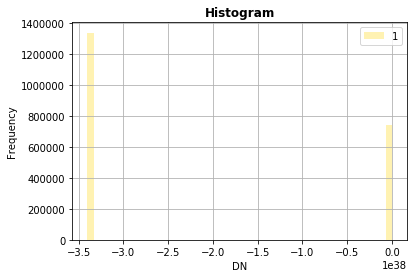

In [12]:
from rasterio.plot import show_hist
show_hist(myThumb, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="Histogram")

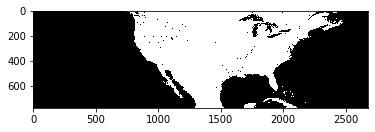

In [13]:
%matplotlib inline
from matplotlib import pyplot
pyplot.imshow(myThumb, cmap='gray')


In [14]:
 modis_ndvi_scaling = 0.0001

In [16]:
dir(src)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__pyx_vtable__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_block_shapes',
 '_closed',
 '_count',
 '_crs',
 '_crs_wkt',
 '_descriptions',
 '_dtypes',
 '_env',
 '_gcps',
 '_get_crs',
 '_handle_crswkt',
 '_has_band',
 '_mask_flags',
 '_nodatavals',
 '_offsets',
 '_read',
 '_scales',
 '_set_all_descriptions',
 '_set_all_offsets',
 '_set_all_scales',
 '_set_all_units',
 '_set_attrs_from_dataset_handle',
 '_set_crs',
 '_set_gcps',
 '_set_nodatavals',
 '_transform',
 '_units',
 'block_shapes',
 'block_size',
 'block_window',
 'block_windows',
 'bounds',
 'checksum',
 'close',
 'closed',
 'colorinterp',
 'colormap',
 'compr

In [17]:
# https://lpdaac.usgs.gov/resources/e-learning/masking-visualizing-and-plotting-appeears-output-geotiff-time-series-python/